# Main Analysis


In [1]:
from pathlib import *
import csv
import sqlalchemy as sa
import numpy as np
import pandas as pd
import axelrod as axl
import random
import matplotlib.pyplot as plt
%matplotlib inline

Size of Database as of writing: 

In [2]:
path_for_images = Path("../../images/folk_thm/main_analysis/")
path_for_images.mkdir(parents=True, exist_ok=True)

database_management_sys = sa.create_engine("sqlite:///../database_code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])


(825700, 159)

## p-Thresholds


Looking at the probabilities of the game ending for all the games (ignoring whether the games are degenerate or not)

In [3]:
p_thresh_data = pd.read_csv("..\database_code\data\prob_end_threshold\main.csv")
p_thresh_data.head(), len(p_thresh_data)


(   number_of_players  tournament_player_set  noise  min_p_threshold  \
 0                  2                      0    0.0         0.293343   
 1                  2                      0    0.1         0.182455   
 2                  2                      0    0.2         0.051404   
 3                  2                      0    0.3         0.001000   
 4                  2                      0    0.4         0.001000   
 
    mean_p_threshold  median_p_threshold  max_p_threshold  possible_degeneracy  
 0          0.293343            0.293343         0.293343                False  
 1          0.182455            0.182455         0.182455                False  
 2          0.088367            0.091727         0.121970                False  
 3          0.001000            0.001000         0.001000                False  
 4          0.001000            0.001000         0.001000                False  ,
 1754)

In [4]:
p_thresh_data.dtypes


number_of_players          int64
tournament_player_set      int64
noise                    float64
min_p_threshold          float64
mean_p_threshold         float64
median_p_threshold       float64
max_p_threshold          float64
possible_degeneracy         bool
dtype: object

In [5]:
p_thresh_drop_na = p_thresh_data.dropna()
len(p_thresh_drop_na)


1001

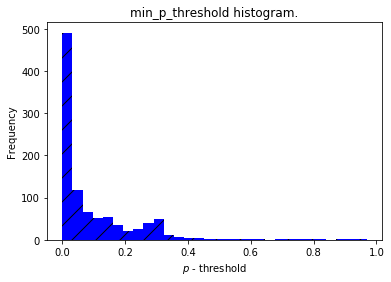

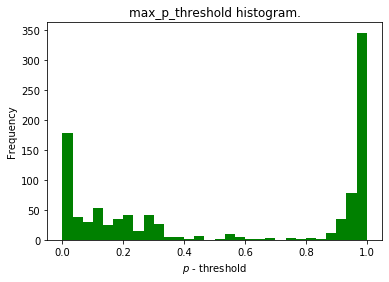

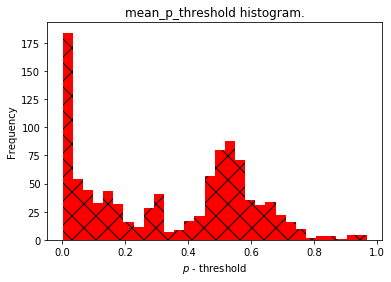

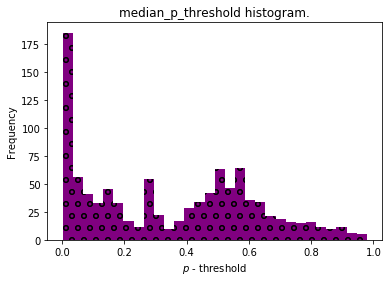

In [6]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
    hist_file_name = str(p_threshold) + "_hist.pdf"
    hist_path = path_for_images / hist_file_name
    p_thresh_plot = plt.figure()
    axes = p_thresh_plot.add_subplot(1, 1, 1)
    axes.set_ylabel("Frequency")
    axes.set_xlabel("$p$ - threshold")
    axes.set_title(str(p_threshold) + " histogram.")
    axes.hist(
        p_thresh_drop_na[p_threshold], bins=30, color=colour, hatch=hatch,
    )
    p_thresh_plot.savefig(str(hist_path))


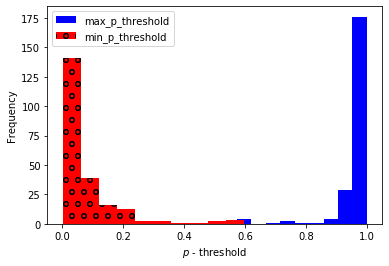

In [8]:
p_mean_middle_data = p_thresh_data[
    (p_thresh_data["mean_p_threshold"] <= 0.6)
    & (p_thresh_data["mean_p_threshold"] >= 0.5)
]

p_mean_middle_data_plot_path = path_for_images / "p_mean_middle_data_plot.pdf"

p_mean_middle_data_plot = plt.figure()
axes = p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_ylabel("Frequency")
axes.set_xlabel("$p$ - threshold")
axes.hist(
    p_mean_middle_data["max_p_threshold"],
    bins=10,
    color="blue",
    hatch=" ",
    label="max_p_threshold",
)
axes.hist(
    p_mean_middle_data["min_p_threshold"],
    bins=10,
    color="red",
    hatch="o",
    label="min_p_threshold",
)
axes.legend()
p_mean_middle_data_plot.savefig(str(p_mean_middle_data_plot_path))


In [8]:
random.sample(list(p_mean_middle_data["tournament_player_set"]), 3)


[123, 157, 37]

Looking at the probabilities of the game ending for all the games which are definitely non-degenerate.

In [9]:
non_degenerate_p_thresh_data = p_thresh_data[
    p_thresh_data["possible_degeneracy"] == False
]
len(p_thresh_data), len(non_degenerate_p_thresh_data)


(1754, 1382)

In [10]:
p_thresh_data_no_degeneracy = p_thresh_drop_na[
    p_thresh_drop_na["possible_degeneracy"] == False
]
p_thresh_data_no_degeneracy.head()


number_of_players  tournament_player_set  noise  min_p_threshold  \
0                  2                      0    0.0         0.293343   
1                  2                      0    0.1         0.182455   
2                  2                      0    0.2         0.051404   
3                  2                      0    0.3         0.001000   
4                  2                      0    0.4         0.001000   

   mean_p_threshold  median_p_threshold  max_p_threshold  possible_degeneracy  
0          0.293343            0.293343         0.293343                False  
1          0.182455            0.182455         0.182455                False  
2          0.088367            0.091727         0.121970                False  
3          0.001000            0.001000         0.001000                False  
4          0.001000            0.001000         0.001000                False

In [11]:
len(p_thresh_drop_na), len(p_thresh_data_no_degeneracy)


(1001, 748)

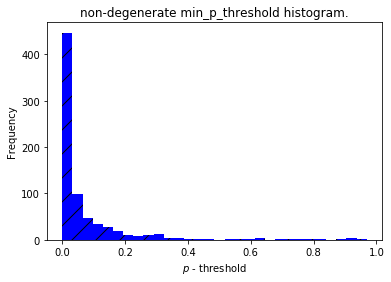

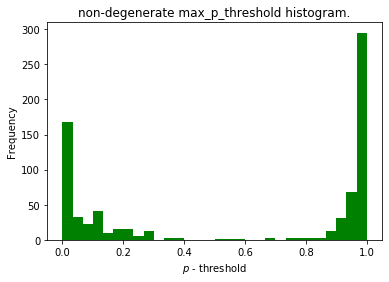

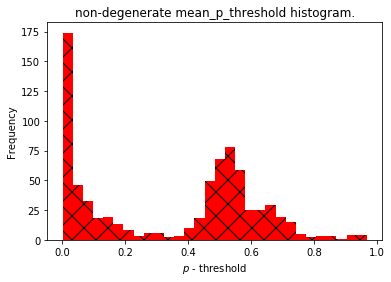

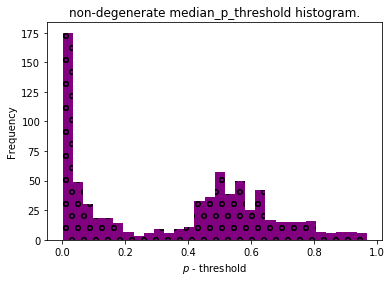

In [12]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
    hist_file_name = "non-degen_" + str(p_threshold) + "_hist.pdf"
    hist_path = path_for_images / hist_file_name
    p_thresh_plot = plt.figure()
    axes = p_thresh_plot.add_subplot(1, 1, 1)
    axes.set_ylabel("Frequency")
    axes.set_xlabel("$p$ - threshold")
    axes.set_title("non-degenerate " + str(p_threshold) + " histogram.")
    axes.hist(
        p_thresh_data_no_degeneracy[p_threshold], bins=30, color=colour, hatch=hatch,
    )
    p_thresh_plot.savefig(str(hist_path))


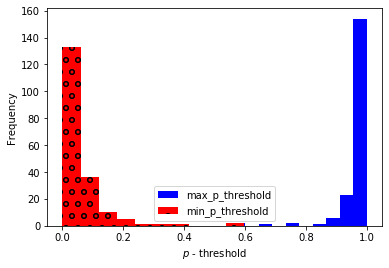

In [13]:
non_degen_p_mean_middle_data = p_thresh_data_no_degeneracy[
    (p_thresh_data_no_degeneracy["mean_p_threshold"] <= 0.6)
    & (p_thresh_data_no_degeneracy["mean_p_threshold"] >= 0.5)
]

non_degen_p_mean_middle_data_plot_path = (
    path_for_images / "non_degen_p_mean_middle_data_plot.pdf"
)

non_degen_p_mean_middle_data_plot = plt.figure()
axes = non_degen_p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_ylabel("Frequency")
axes.set_xlabel("$p$ - threshold")

axes.hist(
    non_degen_p_mean_middle_data["max_p_threshold"],
    bins=10,
    color="blue",
    hatch=" ",
    label="max_p_threshold",
)
axes.hist(
    non_degen_p_mean_middle_data["min_p_threshold"],
    bins=10,
    color="red",
    hatch="o",
    label="min_p_threshold",
)
axes.legend()
non_degen_p_mean_middle_data_plot.savefig(str(non_degen_p_mean_middle_data_plot_path))


### Effects of different number of players


Dealing with NON_DEGENERATE games

In [14]:
separated_player_dict = {}
for player_number in p_thresh_data_no_degeneracy["number_of_players"]:
    separated_player_dict[str(player_number)] = p_thresh_data_no_degeneracy[
        p_thresh_data_no_degeneracy["number_of_players"] == player_number
    ]
separated_player_dict.keys()


dict_keys(['2', '3', '4', '5', '6', '7', '8'])

Finished!


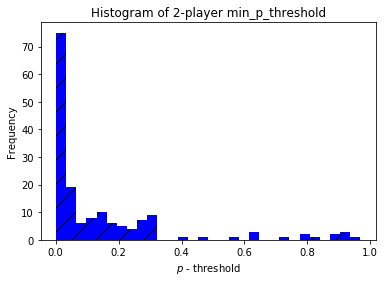

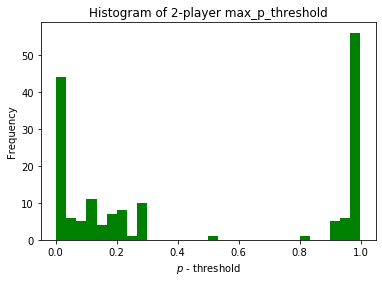

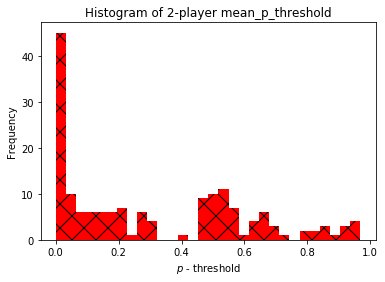

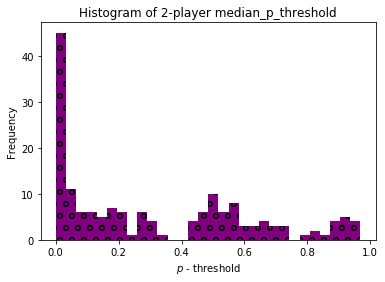

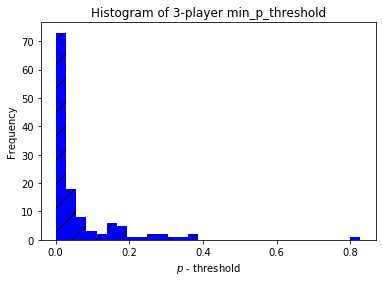

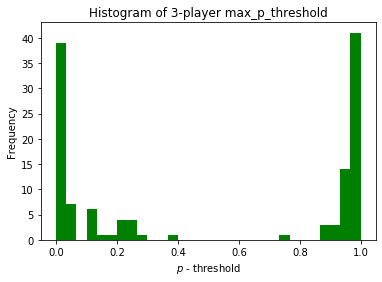

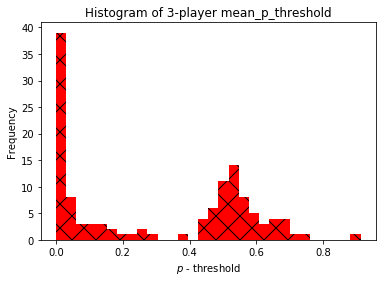

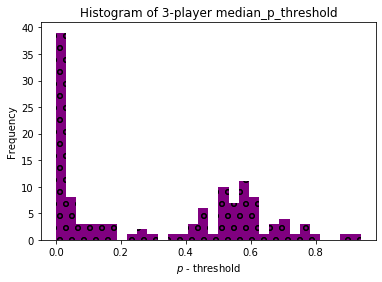

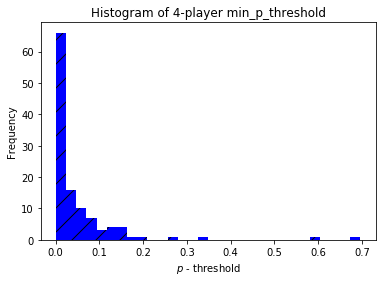

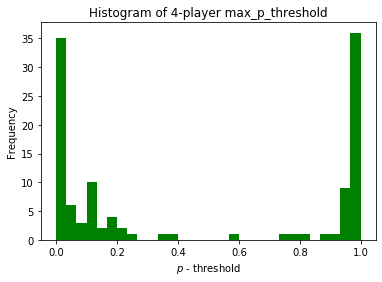

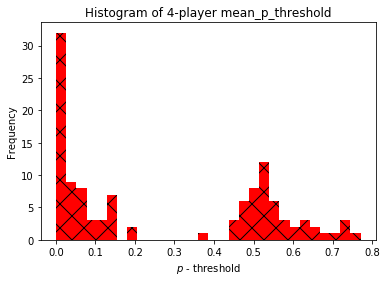

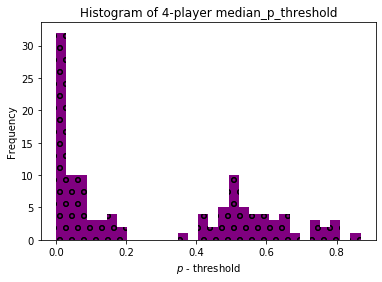

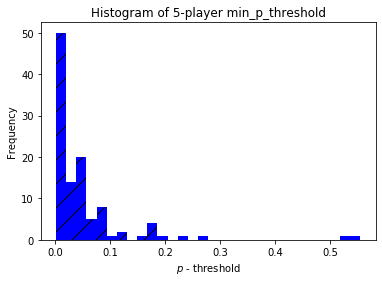

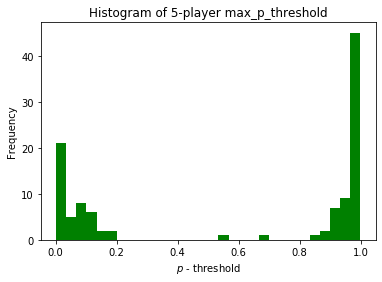

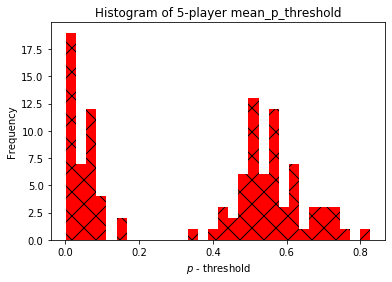

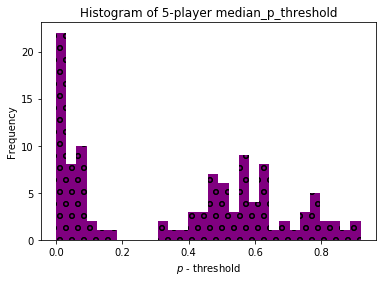

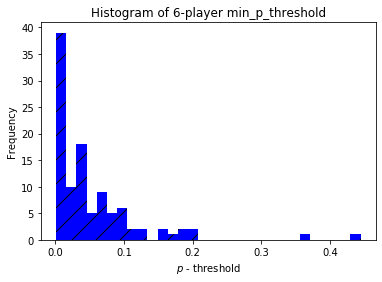

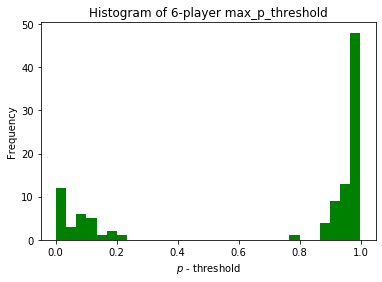

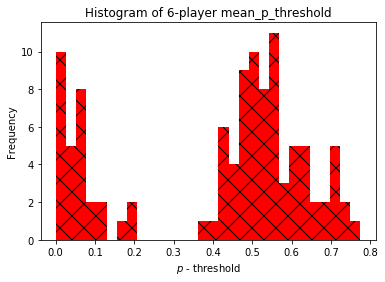

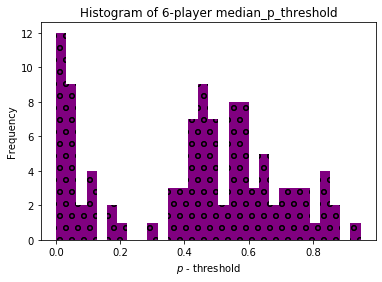

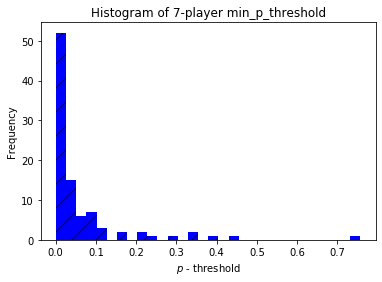

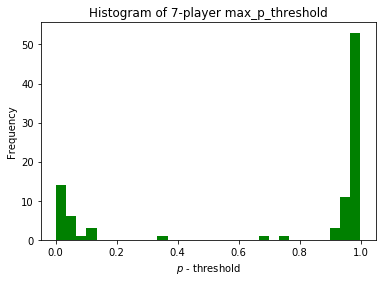

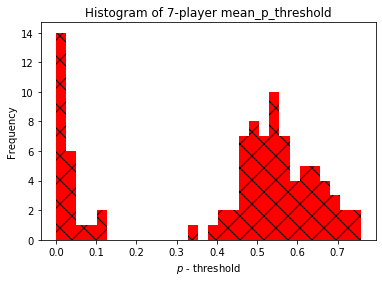

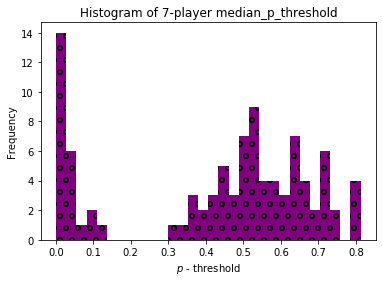

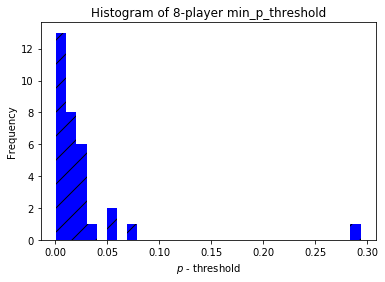

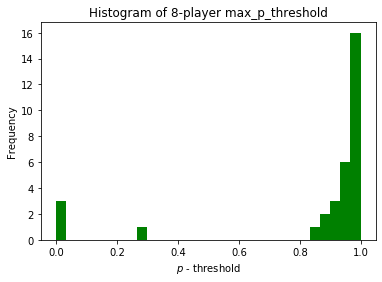

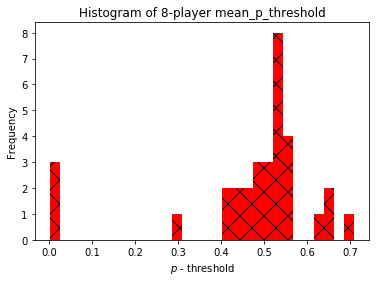

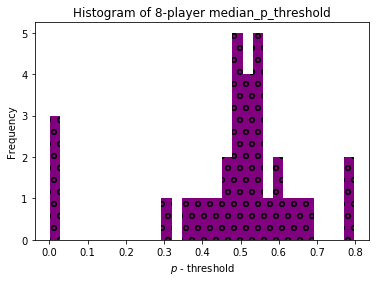

In [15]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for player_number in separated_player_dict.keys():
    for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
        file_name = str(player_number) + "_player_" + str(p_threshold) + "_hist.pdf"
        player_p_thresh_plot_path = path_for_images / file_name
        player_p_thresh_plot = plt.figure()
        axes = player_p_thresh_plot.add_subplot(1, 1, 1)
        axes.set_ylabel("Frequency")
        axes.set_xlabel("$p$ - threshold")
        axes.set_title(
            "Histogram of " + str(player_number) + "-player " + str(p_threshold)
        )
        axes.hist(
            separated_player_dict[str(player_number)][p_threshold],
            bins=30,
            color=colour,
            hatch=hatch,
        )
        player_p_thresh_plot.savefig(str(player_p_thresh_plot_path))
print("Finished!")


In [16]:
for key in separated_player_dict.keys():
    separated_player_dict[key].index = range(len(separated_player_dict[key]))


In [17]:
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold = [], [], [], []
for key in separated_player_dict.keys():
    min_p_threshold.append(separated_player_dict[key]["min_p_threshold"])
    max_p_threshold.append(separated_player_dict[key]["max_p_threshold"])
    mean_p_threshold.append(separated_player_dict[key]["mean_p_threshold"])
    median_p_threshold.append(separated_player_dict[key]["median_p_threshold"])


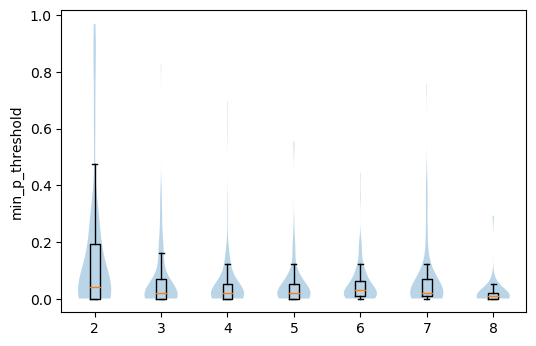

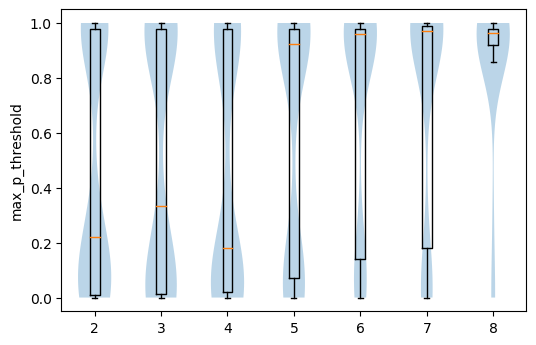

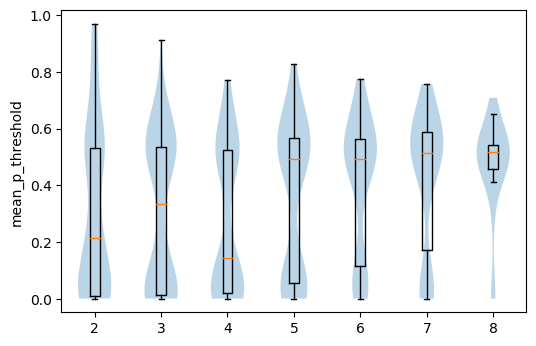

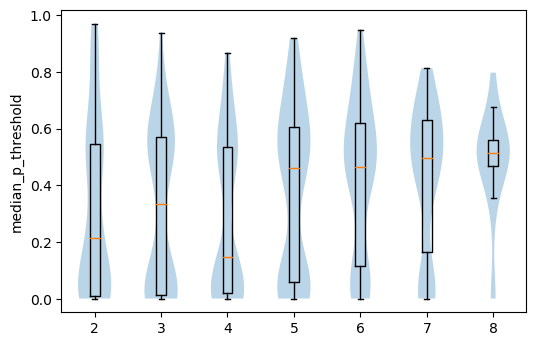

In [22]:
df = p_thresh_data_no_degeneracy

colour = "tab:blue"

for p_thresh in [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]:
    file_name = str(p_thresh) + "_player_violinplot.pdf"
    player_p_violinplot_path = path_for_images / file_name
    fig, ax = plt.subplots(1, dpi=100)
    for pos, (num_of_players, data) in enumerate(
        df.groupby("number_of_players")[p_thresh]
    ):
        vplot = ax.violinplot(data, positions=[pos], showextrema=False)
        ax.boxplot(data, positions=[pos], sym="")
        for body in vplot["bodies"]:
            body.set_facecolor(colour)

    ax.set_xticklabels(df["number_of_players"].unique())
    ax.set_ylabel(str(p_thresh))
    plt.savefig(player_p_violinplot_path)


### Effects of Noise


In [18]:
separated_noise_dict = {}
for amount_of_noise in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    separated_noise_dict[str(amount_of_noise)] = p_thresh_data_no_degeneracy[
        p_thresh_data_no_degeneracy["noise"] == amount_of_noise
    ]
separated_noise_dict.keys()


dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

Finished!


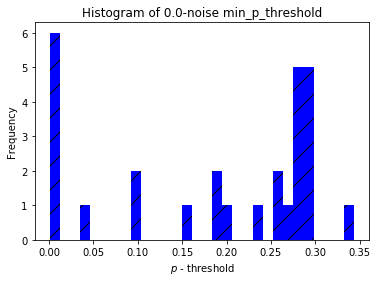

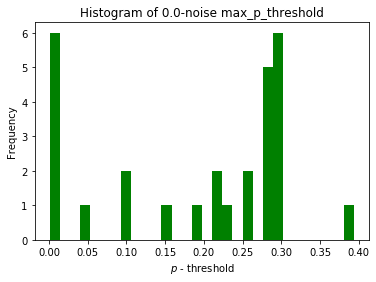

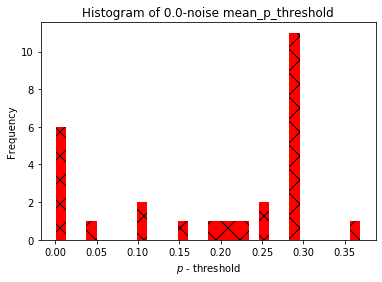

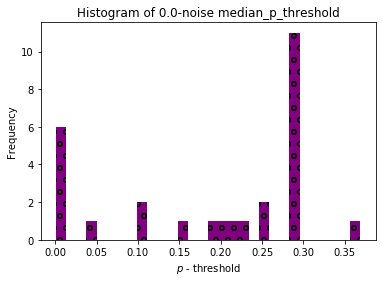

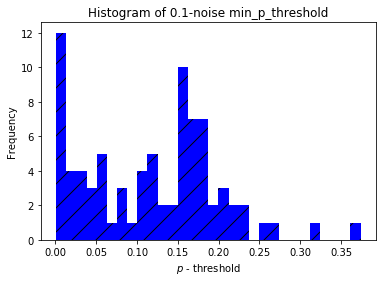

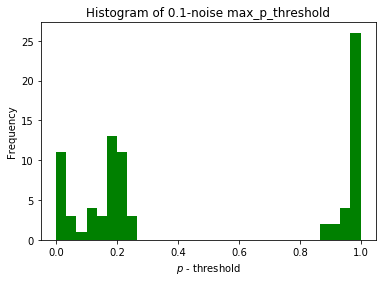

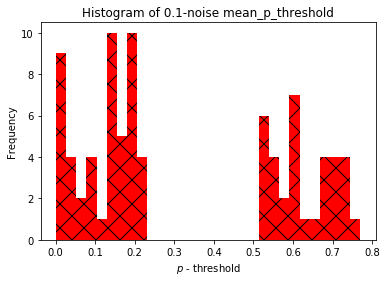

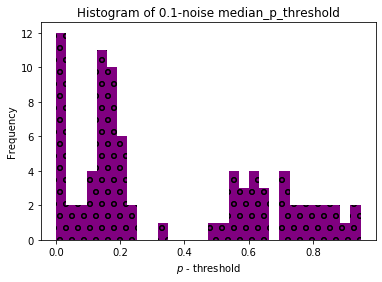

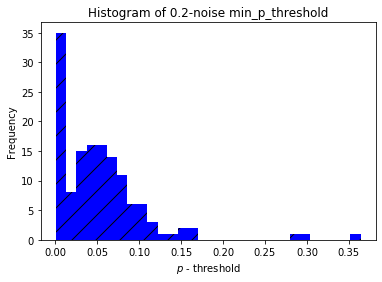

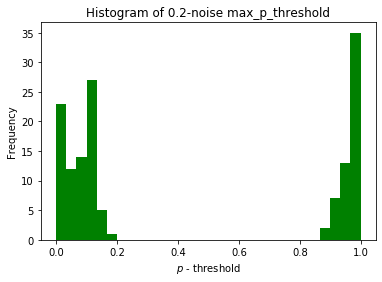

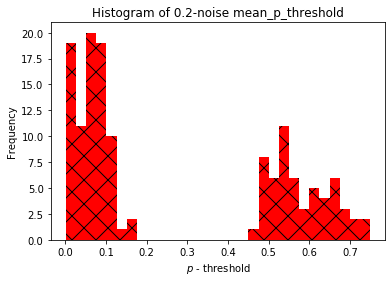

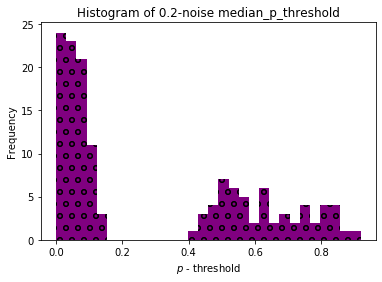

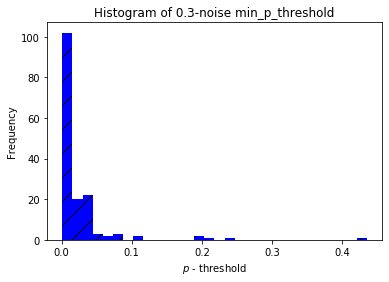

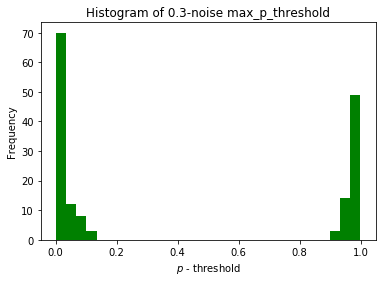

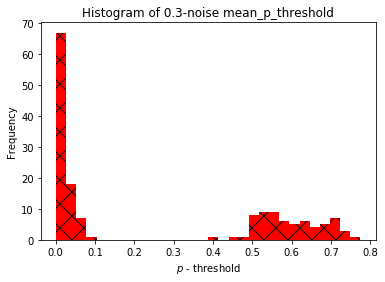

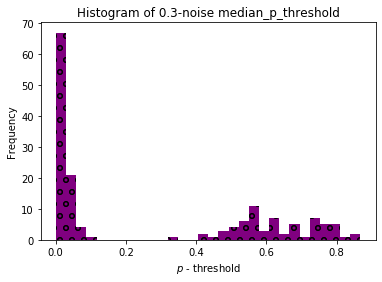

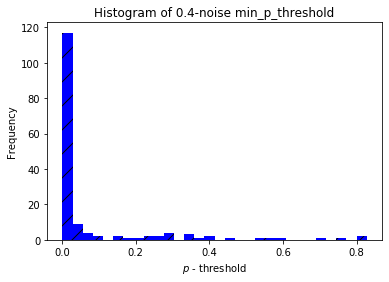

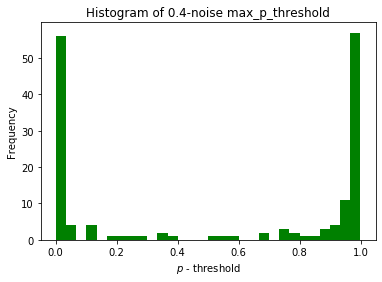

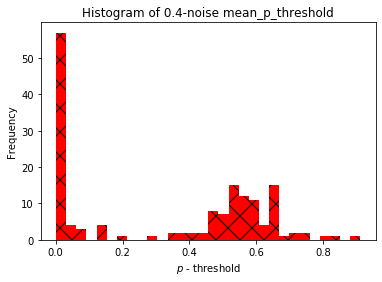

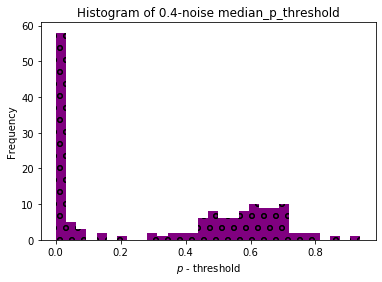

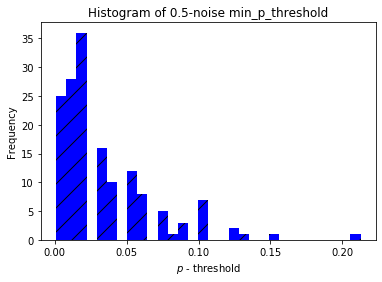

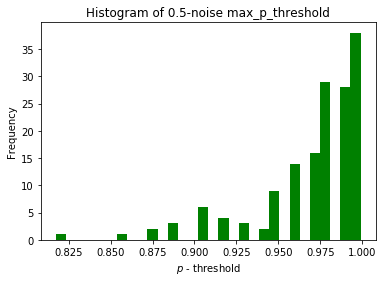

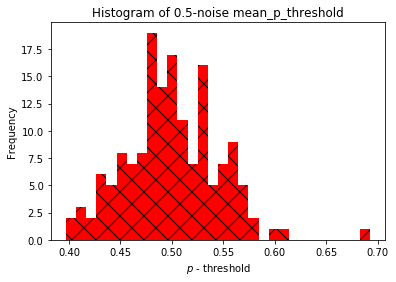

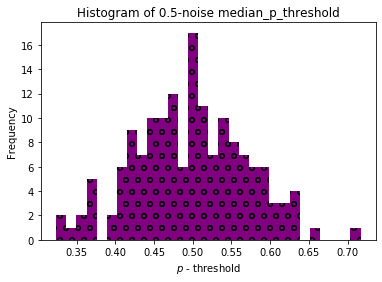

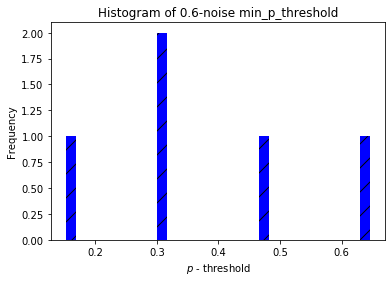

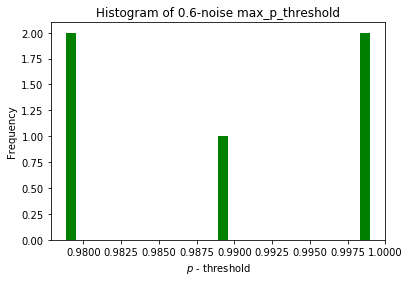

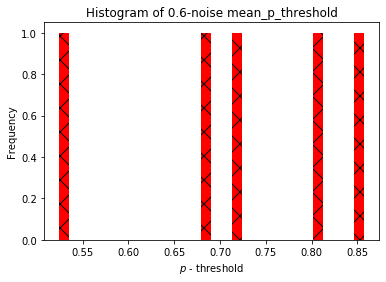

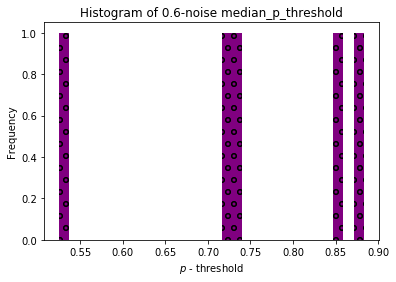

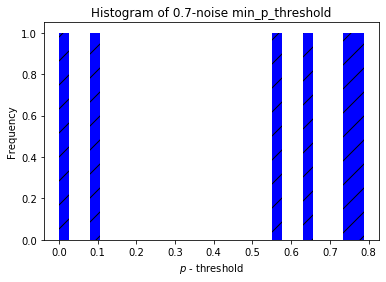

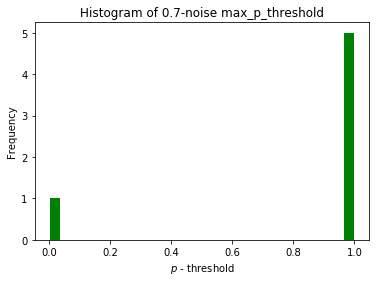

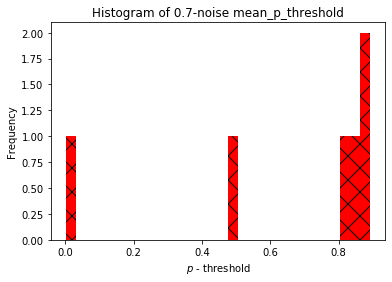

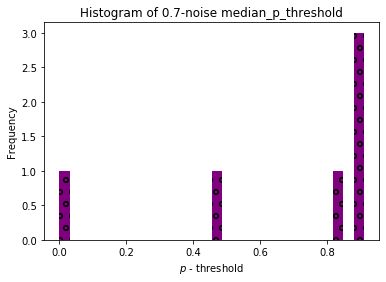

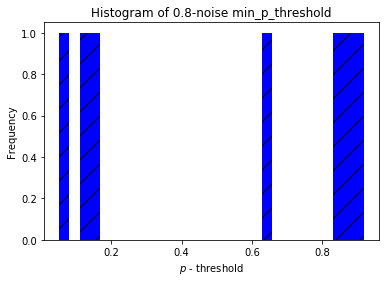

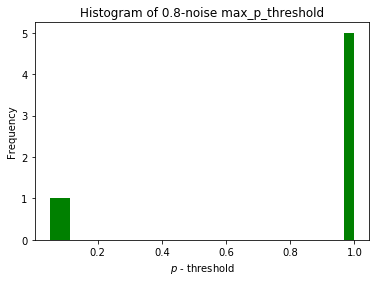

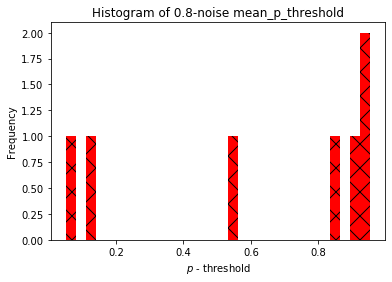

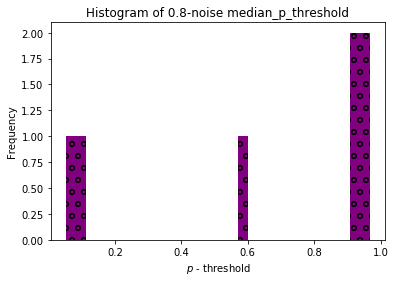

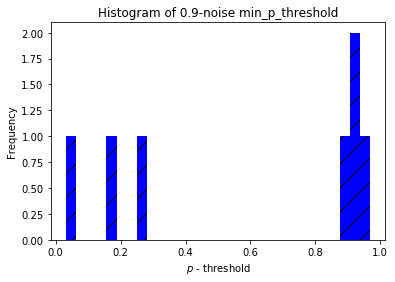

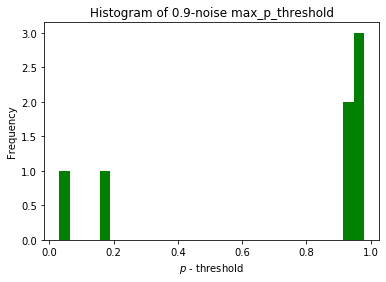

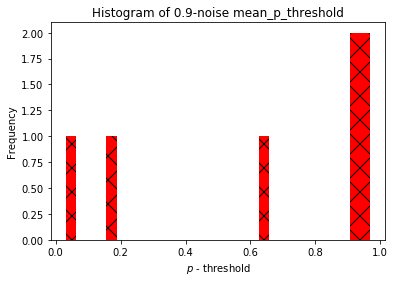

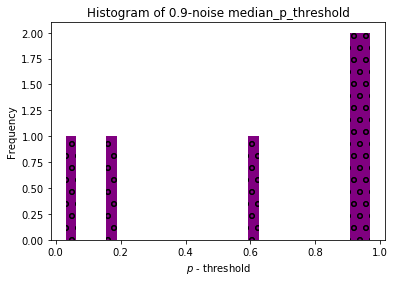

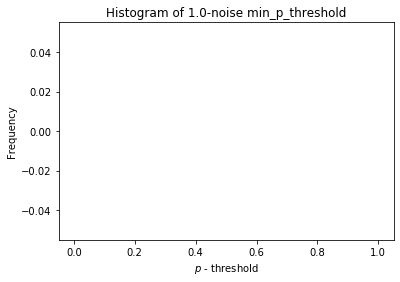

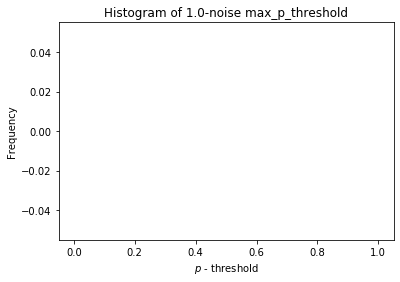

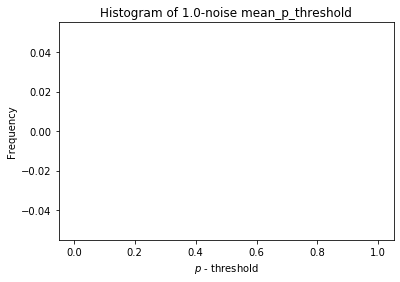

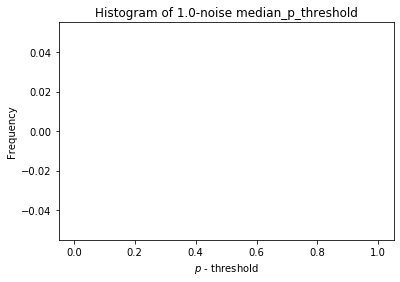

In [19]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for amount_of_noise in separated_noise_dict.keys():
    for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
        file_name = str(amount_of_noise) + "_noise_" + str(p_threshold) + "_hist.pdf"
        noise_p_thresh_plot_path = path_for_images / file_name
        noise_p_thresh_plot = plt.figure()
        axes = noise_p_thresh_plot.add_subplot(1, 1, 1)
        axes.set_ylabel("Frequency")
        axes.set_xlabel("$p$ - threshold")
        axes.set_title(
            "Histogram of " + str(amount_of_noise) + "-noise " + str(p_threshold)
        )
        axes.hist(
            separated_noise_dict[str(amount_of_noise)][p_threshold],
            bins=30,
            color=colour,
            hatch=hatch,
        )
        noise_p_thresh_plot.savefig(str(noise_p_thresh_plot_path))
print("Finished!")


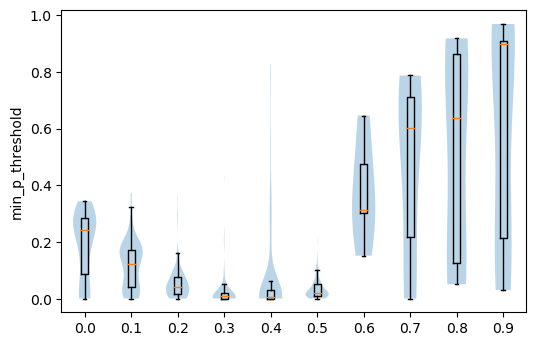

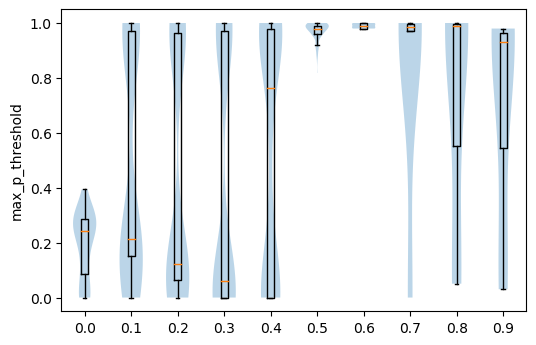

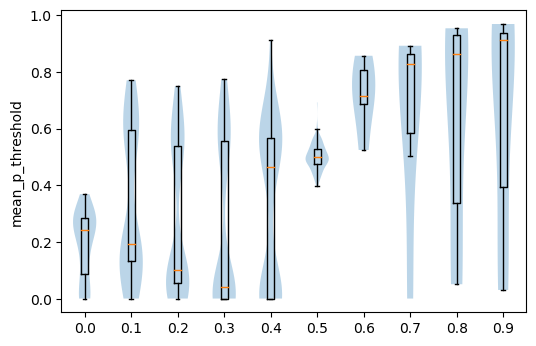

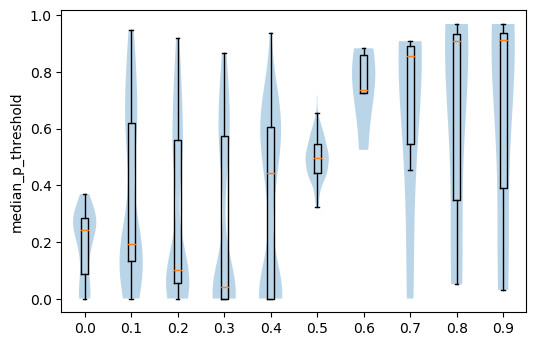

In [20]:
df = p_thresh_data_no_degeneracy

colour = "tab:blue"

for p_thresh in [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]:
    file_name = str(p_thresh) + "_noise_violinplot.pdf"
    noise_p_violinplot_path = path_for_images / file_name
    fig, ax = plt.subplots(1, dpi=100)
    for pos, (noise, data) in enumerate(df.groupby("noise")[p_thresh]):
        vplot = ax.violinplot(data, positions=[pos], showextrema=False)
        ax.boxplot(data, positions=[pos], sym="")
        for body in vplot["bodies"]:
            body.set_facecolor(colour)

    ax.set_xticklabels(df["noise"].unique())
    ax.set_ylabel(str(p_thresh))
    plt.savefig(noise_p_violinplot_path)
